In [11]:
import pandas as pd

# Load Excel file
df = pd.read_excel(r'C:\Users\babuk\Downloads\delhi_cars.xlsx')

# Convert JSON-like strings in relevant columns to dictionaries
df['new_car_detail'] = df['new_car_detail'].apply(eval)
df['new_car_overview'] = df['new_car_overview'].apply(eval)
if 'new_car_feature' in df.columns:
    df['new_car_feature'] = df['new_car_feature'].apply(eval)
df['new_car_specs'] = df['new_car_specs'].apply(eval)

# Step 1: Process 'new_car_detail' column
car_details_df = pd.json_normalize(df['new_car_detail'].apply(lambda x: {k: v for k, v in x.items() if k != 'trendingText'}))
car_details_df['trendingText'] = df['new_car_detail'].apply(lambda x: x.get('trendingText', None))

# Step 2: Process 'new_car_overview' column
overview_top_df = pd.json_normalize(df['new_car_overview'].apply(lambda x: x.get('top', [])))
for col in overview_top_df.columns:
    key = overview_top_df[col].apply(lambda item: item.get('key') if isinstance(item, dict) else None)
    value = overview_top_df[col].apply(lambda item: item.get('value') if isinstance(item, dict) else None)
    
    # Check if key exists and is not None before applying transformations
    if key.iloc[0] is not None:
        column_name = f'{key.iloc[0].replace(" ", "_").lower()}'
        overview_top_df[column_name] = value

# Drop original columns from overview_top_df after expansion
overview_top_df = overview_top_df.drop(columns=overview_top_df.columns[:len(overview_top_df.columns)//2])

# Step 3: Process 'new_car_feature' column
if 'new_car_feature' in df.columns:
    result = []
    for feature_data in df['new_car_feature']:
        features_count = len(feature_data.get('top', []))
        sections = {section['heading']: len(section['list']) for section in feature_data.get('data', [])}
        row = {'Features': features_count}
        row.update(sections)
        result.append(row)
    new_car_feature_df = pd.DataFrame(result)
else:
    new_car_feature_df = pd.DataFrame()

# Step 4: Process 'new_car_specs' column
unique_keys_top = set()
unique_keys_list = set()

# Collect unique keys for 'top' and 'list' sections in 'new_car_specs'
for specs in df['new_car_specs']:
    if 'top' in specs:
        for item in specs['top']:
            unique_keys_top.add(item['key'].replace(" ", "_").lower())
    if 'data' in specs:
        for data_entry in specs['data']:
            if 'list' in data_entry:
                for item in data_entry['list']:
                    unique_keys_list.add(item['key'].replace(" ", "_").lower())

# Extract values based on unique keys and store them in a dictionary for each row
row_values = {}
for i, specs in enumerate(df['new_car_specs']):
    row_dict = {}
    if 'top' in specs:
        for item in specs['top']:
            column_name = item['key'].replace(" ", "_").lower()
            row_dict[column_name] = item['value']
    if 'data' in specs:
        for data_entry in specs['data']:
            if 'list' in data_entry:
                for item in data_entry['list']:
                    column_name = item['key'].replace(" ", "_").lower()
                    row_dict[column_name] = item['value']
    row_values[i] = row_dict

# Convert the row values dictionary for 'new_car_specs' into a DataFrame
new_car_specs_df = pd.DataFrame.from_dict(row_values, orient='index')

# Concatenate all DataFrames into a single DataFrame
df_final = pd.concat([df.drop(columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']), car_details_df, overview_top_df, new_car_feature_df, new_car_specs_df], axis=1)

# Save the final DataFrame to an Excel file
df_final.to_excel(r'C:\Users\babuk\Downloads\processed_delhi_cars.xlsx', index=False)

print("The final processed data has been saved to 'processed_delhi_cars.xlsx'.")

The final processed data has been saved to 'processed_delhi_cars.xlsx'.


In [1]:
import pandas as pd

# Load Excel file
bangalore_df = pd.read_excel(r'C:\Users\babuk\Downloads\processed_bangalore_cars.xlsx')
jaipur_df = pd.read_excel(r'C:\Users\babuk\Downloads\processed_jaipur_cars.xlsx')
chennai_df = pd.read_excel(r'C:\Users\babuk\Downloads\processed_chennai_cars.xlsx')
delhi_df = pd.read_excel(r'C:\Users\babuk\Downloads\processed_delhi_cars.xlsx')
kolkata_df = pd.read_excel(r'C:\Users\babuk\Downloads\processed_kolkata_cars.xlsx')
hyderabad_df = pd.read_excel(r'C:\Users\babuk\Downloads\processed_hyderabad_cars.xlsx')

In [2]:
df_car_details=pd.concat([bangalore_df,jaipur_df,chennai_df,delhi_df,kolkata_df,hyderabad_df])
df_car_details

,car_links,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,top_speed,acceleration,tyre_type,no_door_numbers,cargo_volumn,wheel_size,alloy_wheel_size,ground_clearance_unladen,City,9
0,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN,Bangalore,NaN
1,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN,Bangalore,NaN
2,https://www.cardekho.com/used-car-details/used...,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN,Bangalore,NaN
3,https://www.cardekho.com/buy-used-car-details/...,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN,Bangalore,NaN
4,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN,Bangalore,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Mahindra,Mahindra XUV500,...,175 kmph,12.5 Seconds,"Tubeless,Radial",5.0,NaN,17,17,NaN,Hyderabad,NaN
1479,https://www.cardekho.com/used-car-details/used...,0,Diesel,Sedan,"50,000",Automatic,1,1st Owner,Jaguar,Jaguar XF,...,250 Kmph,6.4 Seconds,"Tubeless,Radial",4.0,540-litres,20,20,NaN,Hyderabad,NaN
1480,https://www.cardekho.com/used-car-details/used...,0,Diesel,Sedan,"1,20,000",Automatic,3,3rd Owner,BMW,BMW 5 Series,...,235kmph,7.5,"Tubeless, Runflat",4.0,520-litres,R18,R18,NaN,Hyderabad,NaN
1481,https://www.cardekho.com/used-car-details/used...,0,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Tata,Tata Nexon,...,154.19 kmph,13.25 Seconds,Tubeless Radial Tyres,5.0,350,NaN,NaN,209 mm,Hyderabad,NaN


In [9]:
df_car_details.to_csv("car.csv", index=False)

In [3]:
df_car_details.isnull().sum()

car_links                      0
it                             0
ft                             0
bt                             4
km                             0
                            ... 
wheel_size                  2983
alloy_wheel_size            2983
ground_clearance_unladen    7854
City                           0
9                           7031
Length: 76, dtype: int64

In [5]:
df_car_details.drop('car_links',axis=1,inplace=True)

In [7]:
df_car_details.drop(9,axis=1,inplace=True)

In [6]:
df_car_details.head(5)

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,rear_brake_type,top_speed,acceleration,tyre_type,no_door_numbers,cargo_volumn,wheel_size,alloy_wheel_size,ground_clearance_unladen,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN,Bangalore


In [13]:
# Get value counts for the 'wheel_size' column
value_counts = df_car_details['wheel_size'].value_counts()

# Display the result
print(value_counts)

wheel_size
16     1500
15     1063
17      826
14      679
18      381
13      352
R16     142
19      109
12       85
R15      83
R17      57
20       43
R18      41
R14       9
R19       8
21        7
R20       1
Name: count, dtype: int64


In [15]:
df_car_details['wheel_size'].fillna('16',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3850693713.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['wheel_size'].fillna('16',inplace=True)


In [17]:
value_counts1 = df_car_details['alloy_wheel_size'].value_counts()

# Display the result
print(value_counts1)

alloy_wheel_size
16     1500
15     1063
17      826
14      679
18      381
13      352
R16     142
19      109
12       85
R15      83
R17      57
20       43
R18      41
R14       9
R19       8
21        7
R20       1
Name: count, dtype: int64


In [19]:
df_car_details['alloy_wheel_size'].fillna('16',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1843638543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['alloy_wheel_size'].fillna('16',inplace=True)


In [29]:
# Calculate the percentage of non-null values for each column
non_null_percentage = df_car_details.notnull().mean() * 100
print(non_null_percentage)

it                          100.000000
ft                          100.000000
bt                           99.952205
km                          100.000000
transmission                100.000000
                               ...    
cargo_volumn                 80.965468
wheel_size                  100.000000
alloy_wheel_size            100.000000
ground_clearance_unladen      6.153662
City                        100.000000
Length: 74, dtype: float64


In [97]:
# Identify columns with less than 80% non-null values
columns_to_drop = non_null_percentage[non_null_percentage < 75].index

# Drop those columns
df_car_details = df_car_details.drop(columns=columns_to_drop)

In [99]:
df_car_details.isnull().sum().head(50)

it                                  0
ft                                  0
bt                                  4
km                                  0
transmission                        0
ownerNo                             0
owner                               0
oem                                 0
model                               0
modelYear                           0
centralVariantId                    0
variantName                         0
price                               0
trendingText                        0
registration_year                   0
insurance_validity                  0
fuel_type                           0
seats                               0
kms_driven                          0
rto                                 0
ownership                           0
engine_displacement                 0
transmission.1                      0
year_of_manufacture                 0
Features                            0
Comfort & Convenience               0
Interior    

In [101]:
df_car_details.isnull().sum().tail(20)

turbo_charger       1040
super_charger       1962
length                79
width                 83
height                79
wheel_base           163
kerb_weight           59
gear_box             106
drive_type          1560
seating_capacity       6
steering_type        255
turning_radius      1600
front_brake_type      96
rear_brake_type       96
tyre_type             77
no_door_numbers        0
cargo_volumn           0
wheel_size             0
alloy_wheel_size       0
City                   0
dtype: int64

In [59]:
value_counts2 = df_car_details['no_door_numbers'].value_counts()

# Display the result
print(value_counts2)

no_door_numbers
5.0    5800
4.0    2499
3.0      44
2.0      13
6.0       2
Name: count, dtype: int64


In [61]:
df_car_details['no_door_numbers'].fillna(5.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\201828011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['no_door_numbers'].fillna(5.0,inplace=True)


In [63]:
value_counts3 = df_car_details['cargo_volumn'].value_counts()

# Display the result
print(value_counts3)

cargo_volumn
510-litres    292
339-litres    283
268           212
400-litres    195
350           157
             ... 
300-litre       1
483lts          1
410             1
398-litres      1
180 liters      1
Name: count, Length: 321, dtype: int64


In [65]:
df_car_details['cargo_volumn'].fillna('510-litres',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\414342451.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['cargo_volumn'].fillna('510-litres',inplace=True)


In [69]:
df_car_details['rto'].value_counts()

rto
WB02           451
First Owner    418
RJ14           363
TS07           282
TS08           243
              ... 
UP63             1
TN99             1
998 cc           1
TN88             1
AP37             1
Name: count, Length: 391, dtype: int64

In [71]:
df_car_details['rto'].fillna('WB02',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1629572254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['rto'].fillna('WB02',inplace=True)


In [73]:
df_car_details['ownership'].value_counts()

ownership
First Owner     4401
Second Owner    1524
Third Owner      274
HR26             167
UP16             111
                ... 
KA01               1
UK14               1
TS09               1
HR89               1
2354 cc            1
Name: count, Length: 249, dtype: int64

In [77]:
df_car_details['ownership'].fillna('First Owner',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3349244690.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['ownership'].fillna('First Owner',inplace=True)


In [79]:
df_car_details['engine_displacement'].value_counts()

engine_displacement
1197 cc        1226
First Owner    1060
Manual          571
998 cc          502
1199 cc         388
               ... 
2200 cc           1
3597 cc           1
2360 cc           1
2017              1
2231 cc           1
Name: count, Length: 148, dtype: int64

In [81]:
df_car_details['engine_displacement'].fillna('1197 cc',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\911061807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['engine_displacement'].fillna('1197 cc',inplace=True)


In [83]:
df_car_details['transmission.1'].value_counts()

transmission.1
Manual       4615
Automatic    1643
1197 cc       275
998 cc         91
1497 cc        77
             ... 
1797 cc         1
2894 cc         1
793 cc          1
1047 cc         1
2157 cc         1
Name: count, Length: 118, dtype: int64

In [85]:
df_car_details['transmission.1'].fillna('Manual',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\2235581572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['transmission.1'].fillna('Manual',inplace=True)


In [87]:
df_car_details['year_of_manufacture'].value_counts()

year_of_manufacture
Manual       832
2018.0       760
2017.0       707
2016.0       642
2019.0       601
Automatic    506
2021.0       502
2020.0       465
2014.0       452
2015.0       445
2022.0       400
2013.0       303
2012.0       274
2010.0       195
2011.0       192
2009.0        94
2008.0        60
2023.0        45
2007.0        40
2006.0        31
2004.0        18
2005.0        17
2003.0        10
2002.0         5
Name: count, dtype: int64

In [91]:
df_car_details['year_of_manufacture'].fillna('Manual',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\132440175.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['year_of_manufacture'].fillna('Manual',inplace=True)


In [93]:
df_car_details['Comfort & Convenience'].value_counts()

Comfort & Convenience
11.0    637
10.0    551
16.0    520
15.0    519
17.0    507
14.0    450
12.0    446
13.0    443
20.0    390
9.0     389
19.0    346
21.0    332
18.0    305
23.0    292
8.0     229
5.0     220
22.0    212
7.0     196
24.0    194
27.0    170
6.0     167
25.0    150
29.0    128
26.0    122
28.0     96
30.0     59
31.0     59
2.0      43
32.0     37
33.0     21
3.0      20
4.0      18
1.0      14
34.0      9
35.0      7
37.0      3
Name: count, dtype: int64

In [95]:
df_car_details['Comfort & Convenience'].fillna(11.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\2826898329.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['Comfort & Convenience'].fillna(11.0,inplace=True)


In [103]:
df_car_details['Interior'].value_counts()

Interior
11.0    1562
12.0    1512
10.0    1283
9.0      928
13.0     646
8.0      586
7.0      567
6.0      361
14.0     308
15.0     207
5.0      137
4.0       63
16.0      60
3.0       31
2.0       13
1.0       13
17.0      10
18.0       5
Name: count, dtype: int64

In [105]:
df_car_details['Interior'].fillna(11.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\720106280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['Interior'].fillna(11.0,inplace=True)


In [107]:
df_car_details['Exterior'].value_counts()

Exterior
12.0    786
10.0    673
5.0     615
11.0    608
13.0    594
9.0     588
7.0     543
8.0     527
6.0     489
16.0    454
15.0    426
4.0     397
14.0    365
18.0    254
3.0     183
17.0    166
20.0    150
19.0    126
2.0      82
23.0     82
21.0     68
22.0     35
24.0     23
1.0      20
26.0     18
25.0      5
27.0      2
Name: count, dtype: int64

In [109]:
df_car_details['Exterior'].fillna(12.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\220693442.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['Exterior'].fillna(12.0,inplace=True)


In [111]:
df_car_details['Safety'].value_counts()

Safety
24.0    749
23.0    570
22.0    539
27.0    517
28.0    435
25.0    415
26.0    397
20.0    394
21.0    362
29.0    335
30.0    329
17.0    326
19.0    274
16.0    268
13.0    256
15.0    189
32.0    184
11.0    174
31.0    162
18.0    161
14.0    151
10.0    138
33.0    129
34.0    120
35.0     97
12.0     92
38.0     83
37.0     73
9.0      73
36.0     64
6.0      59
7.0      40
39.0     28
8.0      18
40.0     17
42.0     15
5.0      13
41.0     11
45.0      7
48.0      4
1.0       3
44.0      2
Name: count, dtype: int64

In [113]:
df_car_details['Safety'].fillna(24.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\798157972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['Safety'].fillna(24.0,inplace=True)


In [115]:
df_car_details['Entertainment & Communication'].value_counts()

Entertainment & Communication
8.0     1293
7.0     1149
9.0     1094
6.0      754
10.0     674
4.0      599
11.0     576
5.0      505
12.0     228
3.0      142
2.0       93
13.0      68
1.0       38
14.0      29
15.0      14
16.0       7
21.0       5
19.0       4
17.0       2
Name: count, dtype: int64

In [117]:
df_car_details['Entertainment & Communication'].fillna(8.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1085951926.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['Entertainment & Communication'].fillna(8.0,inplace=True)


In [119]:
df_car_details['mileage'].value_counts()

mileage
18.9 kmpl     306
18.6 kmpl     225
21.4 kmpl     198
17 kmpl       191
18 kmpl       145
             ... 
11.24 kmpl      1
19.19 kmpl      1
14.19 kmpl      1
14.49 kmpl      1
9.74 kmpl       1
Name: count, Length: 522, dtype: int64

In [121]:
df_car_details['mileage'].fillna('18.9 kmpl',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1354456680.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['mileage'].fillna('18.9 kmpl',inplace=True)


In [123]:
df_car_details['engine'].value_counts()

engine
1197 CC    1607
998 CC      640
1199 CC     489
1497 CC     451
1248 CC     424
           ... 
4395 CC       1
4134 CC       1
1468 CC       1
2997 CC       1
2231 CC       1
Name: count, Length: 150, dtype: int64

In [125]:
df_car_details['engine'].fillna('1197 CC',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\2326327687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['engine'].fillna('1197 CC',inplace=True)


In [127]:
df_car_details['max_power'].value_counts()

max_power
81.80bhp@6000rpm     291
81.86bhp@6000rpm     277
88.50bhp@6000rpm     267
83.1bhp@6000rpm      198
74bhp@4000rpm        171
                    ... 
255bhp@3750rpm         1
214.5bhp@5700rpm       1
214.56bhp@5700rpm      1
254.79bhp@3400rpm      1
61.6bhp@6200rpm        1
Name: count, Length: 760, dtype: int64

In [129]:
df_car_details['max_power'].fillna('81.80bhp@6000rpm',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3230949812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['max_power'].fillna('81.80bhp@6000rpm',inplace=True)


In [131]:
df_car_details['torque'].value_counts()

torque
113Nm    570
200Nm    397
90Nm     378
110Nm    303
145Nm    276
        ... 
500nm      1
190nm      1
135Nm      1
196Nm      1
16.1       1
Name: count, Length: 366, dtype: int64

In [133]:
df_car_details['torque'].fillna('113Nm',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1646492742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['torque'].fillna('113Nm',inplace=True)


In [135]:
df_car_details['seats.1'].value_counts()

seats.1
5.0     7354
7.0      728
6.0      103
4.0       93
8.0       62
9.0       11
2.0        7
10.0       5
Name: count, dtype: int64

In [139]:
df_car_details['seats.1'].fillna(5.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\2731724030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['seats.1'].fillna(5.0,inplace=True)


In [141]:
df_car_details['engine_type'].value_counts()

engine_type
In-Line Engine                  484
Kappa VTVT Petrol Engine        425
Petrol Engine                   315
i-VTEC Petrol Engine            267
i VTEC Engine                   201
                               ... 
i-DTEC                            1
40 TFSI quattro S tronic          1
mHawk 120 Diesel Engine           1
Common Rail Direct Injection      1
K Series Engine                   1
Name: count, Length: 508, dtype: int64

In [143]:
df_car_details['engine_type'].fillna('In-Line Engine',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\4263959217.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['engine_type'].fillna('In-Line Engine',inplace=True)


In [145]:
df_car_details['displacement'].value_counts()

displacement
1197.0    1607
998.0      640
1199.0     489
1497.0     451
1248.0     424
          ... 
4395.0       1
4134.0       1
1468.0       1
2997.0       1
2231.0       1
Name: count, Length: 150, dtype: int64

In [147]:
df_car_details['displacement'].fillna(1197.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3129361315.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['displacement'].fillna(1197.0,inplace=True)


In [149]:
df_car_details['max_torque'].value_counts()

max_torque
90Nm@3500rpm          378
200Nm@1750rpm         283
113Nm@4200rpm         275
113Nm@4400rpm         238
110Nm@4800rpm         233
                     ... 
110Nm                   1
340Nm@1750-2750rpm      1
70Nm@1000rpm            1
95.2Nm@4000rpm          1
85Nm@3500rpm            1
Name: count, Length: 617, dtype: int64

In [151]:
df_car_details['max_torque'].fillna('90Nm@3500rpm',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1832352769.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['max_torque'].fillna('90Nm@3500rpm',inplace=True)


In [153]:
df_car_details['no_of_cylinder'].value_counts()

no_of_cylinder
4.0     6141
3.0     2004
6.0      129
5.0       23
2.0       15
7.0       13
8.0       12
23.0       1
Name: count, dtype: int64

In [155]:
df_car_details['no_of_cylinder'].fillna(4.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1707508879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['no_of_cylinder'].fillna(4.0,inplace=True)


In [157]:
df_car_details['values_per_cylinder'].value_counts()

values_per_cylinder
4.0     7907
2.0      209
3.0      197
5.0        4
69.0       1
Name: count, dtype: int64

In [159]:
df_car_details['values_per_cylinder'].fillna(4.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\2000881539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['values_per_cylinder'].fillna(4.0,inplace=True)


In [161]:
df_car_details['turbo_charger'].value_counts()

turbo_charger
No       4231
Yes      2994
Twin       52
NO         20
YES        15
no          9
yes         5
Turbo       2
twin        1
Name: count, dtype: int64

In [165]:
df_car_details['turbo_charger'].fillna('No',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\139851998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['turbo_charger'].fillna('No',inplace=True)


In [167]:
df_car_details['length'].value_counts()

length
3995mm      1049
4440mm       350
3765mm       288
3985mm       240
3585mm       175
            ... 
4400 mm        1
4482           1
2974           1
4885 mm        1
4,530 mm       1
Name: count, Length: 419, dtype: int64

In [127]:
df_car_detail['length'].fillna('3995mm',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_11568\274268417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_detail['length'].fillna('3995mm',inplace=True)


In [169]:
df_car_details['width'].value_counts()

width
1695mm      619
1660mm      322
1745mm      311
1734mm      274
1680mm      251
           ... 
1,832 mm      1
1818          1
2106mm        1
1698mm        1
1,705 mm      1
Name: count, Length: 318, dtype: int64

In [171]:
df_car_details['width'].fillna('1695mm',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3113765640.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['width'].fillna('1695mm',inplace=True)


In [173]:
df_car_details['color'].value_counts()

color
Others           2168
White            1655
Silver           1281
Red               798
Blue              605
                 ... 
Golden brown        1
P Black             1
TAFETA WHITE        1
Light Orange        1
Arctic Silver       1
Name: count, Length: 153, dtype: int64

In [175]:
df_car_details['color'].fillna('Others',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3087220105.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['color'].fillna('Others',inplace=True)


In [177]:
df_car_details['height'].value_counts()

height
1505mm      391
1475mm      368
1520mm      336
1510mm      323
1495mm      285
           ... 
1,940 mm      1
1432          1
1672mm        1
1812mm        1
1,490 mm      1
Name: count, Length: 354, dtype: int64

In [179]:
df_car_details['height'].fillna('1505mm',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\972349144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['height'].fillna('1505mm',inplace=True)


In [181]:
df_car_details['wheel_base'].value_counts()

wheel_base
2425mm      415
2600mm      412
2520mm      369
2570mm      318
2450mm      311
           ... 
2939mm        1
2895mm        1
3365 mm       1
2,456 mm      1
2,600 mm      1
Name: count, Length: 273, dtype: int64

In [183]:
df_car_details['wheel_base'].fillna('2425mm',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3003342255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['wheel_base'].fillna('2425mm',inplace=True)


In [185]:
df_car_details['kerb_weight'].value_counts()

kerb_weight
935kg       146
875-905     146
1066kg      141
870kg       119
1120        103
           ... 
1700Kg        1
1365          1
1268kg        1
1830          1
1,160 kg      1
Name: count, Length: 901, dtype: int64

In [187]:
df_car_details['kerb_weight'].fillna('935kg',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\2726181241.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['kerb_weight'].fillna('935kg',inplace=True)


In [189]:
df_car_details['gear_box'].value_counts()

gear_box
5 Speed                             4463
6 Speed                             1049
5-Speed                              541
7 Speed                              261
6-Speed                              237
                                    ... 
8-speed Steptronic Automatic           1
10-speed Automatic                     1
Six Speed Automatic Transmission       1
5-Speed                                1
7 Speed S tronic                       1
Name: count, Length: 118, dtype: int64

In [191]:
df_car_details['gear_box'].fillna('5 Speed',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\2660488692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['gear_box'].fillna('5 Speed',inplace=True)


In [193]:
df_car_details['drive_type'].value_counts()

drive_type
FWD                                  5509
RWD                                   416
AWD                                   282
2WD                                   159
4WD                                   143
4X2                                    68
2 WD                                   47
Front Wheel Drive                      43
4X4                                    41
FWD                                    34
4x2                                    18
Two Wheel Drive                        15
4x4                                    11
All Wheel Drive                         7
Rear Wheel Drive with ESP               6
RWD(with MTT)                           5
Permanent all-wheel drive quattro       2
4 WD                                    1
2WD                                     1
AWD INTEGRATED MANAGEMENT               1
Name: count, dtype: int64

In [195]:
df_car_details['drive_type'].fillna('FWD',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3425899191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['drive_type'].fillna('FWD',inplace=True)


In [199]:
df_car_details['seating_capacity'].value_counts()

seating_capacity
5.0     7354
7.0      728
6.0      103
4.0       93
8.0       62
9.0       11
2.0        7
10.0       5
Name: count, dtype: int64

In [201]:
df_car_details['seating_capacity'].fillna(5.0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3550720811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['seating_capacity'].fillna(5.0,inplace=True)


In [203]:
df_car_details['steering_type'].value_counts()

steering_type
Power         6394
Electric      1439
Electronic     106
Manual          86
Electrical      48
power           29
EPAS             9
Hydraulic        2
electric         1
Name: count, dtype: int64

In [205]:
df_car_details['steering_type'].fillna('Power',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\4126996870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['steering_type'].fillna('Power',inplace=True)


In [207]:
df_car_details['turning_radius'].value_counts()

turning_radius
5.3 metres      651
5.2 metres      536
4.8 metres      481
4.7 metres      372
4.6 metres      304
               ... 
6.2 Seconds       1
13.51 metres      1
5.3 Meters        1
12 metres         1
4.6 metres        1
Name: count, Length: 196, dtype: int64

In [209]:
df_car_details['turning_radius'].fillna('5.3 metres',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\2248294963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['turning_radius'].fillna('5.3 metres',inplace=True)


In [211]:
df_car_details['front_brake_type'].value_counts()

front_brake_type
Disc                                        5314
Ventilated Disc                             2566
Disc                                          73
Ventilated Discs                              67
Solid Disc                                    63
Disc & Caliper Type                           42
Ventilated Disc                               26
Disk                                          23
Ventilated Disk                               11
Ventilated discs                              10
Vantilated Disc                                8
Disc, 236 mm                                   8
disc                                           7
Multilateral Disc                              6
Drum                                           6
 Disc                                          6
Ventlated Disc                                 6
Ventilated DIsc                                5
Electric Parking Brake                         3
Ventillated Disc                               3
Vac

In [213]:
df_car_details['front_brake_type'].fillna('Disc',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\3624626532.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['front_brake_type'].fillna('Disc',inplace=True)


In [215]:
df_car_details['rear_brake_type'].value_counts()

rear_brake_type
Drum                                        6443
Disc                                        1192
Ventilated Disc                              195
Solid Disc                                   123
Discs                                         85
Disc & Caliper Type                           42
Leading-Trailing Drum                         30
Self-Adjusting Drum                           25
Ventilated Discs                              24
Leading & Trailing Drum                       16
Ventilated discs                              10
Drums                                          9
Drums 180 mm                                   8
Disc & Drum                                    7
Drum                                           6
Self Adjusting Drums                           6
Ventilated Disc                                6
disc                                           5
Solid Disc                                     5
Ventilated Drum                                4
Elec

In [217]:
df_car_details['rear_brake_type'].fillna('Drum',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\4079865069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['rear_brake_type'].fillna('Drum',inplace=True)


In [219]:
df_car_details['tyre_type'].value_counts()

tyre_type
Tubeless,Radial               4436
Tubeless, Radial              1408
Tubeless                      1167
Tubeless Tyres                 423
Radial, Tubeless               226
Radial                         134
Radial, Tubless                 82
Tubeless Tyres, Radial          61
Tubeless,Radial                 57
Radial,Tubeless                 55
Tubeless Radial Tyres           53
Tubeless,Radials                33
Tubless, Radial                 29
Tubeless,Runflat                18
Tubeless, Runflat               17
tubeless tyre                   14
Run-Flat                        14
Runflat                         12
Runflat Tyres                   11
Tubeless                         7
Radial Tubeless                  6
Runflat Tyre                     5
Radial                           5
Tubeless Tyres Mud Terrain       3
Tubeless Radials Tyre            3
Tubeless. Runflat                2
Radial with tube                 2
Tubeless Radial                  2
Tubeless T

In [221]:
df_car_details['tyre_type'].fillna('Tubeless,Radial',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1271802305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['tyre_type'].fillna('Tubeless,Radial',inplace=True)


In [223]:
df_car_details['bt'].value_counts()

bt
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

In [225]:
df_car_details['bt'].fillna('Hatchback',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\620316904.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['bt'].fillna('Hatchback',inplace=True)


In [227]:
df_car_details['registration_year'].value_counts()

registration_year
2022             225
2018             201
2017             195
2021             188
2016             187
                ... 
Apr 2008           1
Not Available      1
Dec 2006           1
Oct 2008           1
Aug 2006           1
Name: count, Length: 237, dtype: int64

In [229]:
df_car_details['registration_year'].fillna('2018',inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\753372781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_car_details['registration_year'].fillna('2018',inplace=True)


In [231]:
df_car_details['kerb_weight'].value_counts()

kerb_weight
935kg       205
875-905     146
1066kg      141
870kg       119
1120        103
           ... 
1700Kg        1
1365          1
1268kg        1
1830          1
1,160 kg      1
Name: count, Length: 901, dtype: int64

In [233]:
# Remove commas from the 'km' column
df_car_details['km'] = df_car_details['km'].str.replace(',', '', regex=False)

# Optionally, convert the column to numeric if needed
df_car_details['km'] = pd.to_numeric(df_car_details['km'])

In [235]:
df_car_details.drop('ownerNo',axis=1,inplace=True)

In [237]:
# Remove ordinal suffixes and keep only the numeric part
df_car_details['owner'] = df_car_details['owner'].str.extract('(\d+)')

# Convert the 'owner' column to numeric type (optional but useful for calculations)
df_car_details['owner'] = pd.to_numeric(df_car_details['owner'])

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\570530821.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_car_details['owner'] = df_car_details['owner'].str.extract('(\d+)')


In [241]:
df_car_details['price'] = df_car_details['price'].str.replace('₹', '', regex=False)  # Remove ₹ symbol
#df_car_detail['price'] = df_car_detail['price'].str.replace(' Lakh', '', regex=False)  # Remove 'Lakh' text

In [243]:
df_car_details['price'] = df_car_details['price'].str.replace(',', '', regex=False)  # Remove commas
#df_car_detail['price'] = df_car_detail['price'].str.replace(' Crore', '', regex=False)  # Remove 'Crore' text
#df_car_detail['price'] = pd.to_numeric(df_car_detail['price'])  # Convert to numeric

In [247]:
file_path = 'reverted_prices.xlsx'  # Specify your file path here
df_car_details.to_excel(file_path, index=False)

In [513]:
# Step 1: Read the Excel file
file_path = "reverted_prices.xlsx"  # Change this to your actual file path
df_car_detail = pd.read_excel(file_path)

# Optional: View the first few rows
print(df_car_detail.head())

   it      ft         bt      km transmission  owner      oem  \
0   0  Petrol  Hatchback  120000       Manual      3   Maruti   
1   0  Petrol        SUV   32706       Manual      2     Ford   
2   0  Petrol  Hatchback   11949       Manual      1     Tata   
3   0  Petrol      Sedan   17794       Manual      1  Hyundai   
4   0  Diesel        SUV   60000       Manual      1   Maruti   

                model  modelYear  centralVariantId  ... steering_type  \
0      Maruti Celerio       2015              3979  ...         Power   
1       Ford Ecosport       2018              6087  ...         Power   
2          Tata Tiago       2018              2983  ...         Power   
3       Hyundai Xcent       2014              1867  ...         Power   
4  Maruti SX4 S Cross       2015              4277  ...         Power   

  turning_radius front_brake_type rear_brake_type         tyre_type  \
0     4.7 metres  Ventilated Disc            Drum  Tubeless, Radial   
1     5.3 metres  Ventilated

In [514]:
df_car_detail['price'].value_counts()

price
6.50 Lakh     106
4.50 Lakh      98
3 Lakh         97
5 Lakh         97
4 Lakh         90
             ... 
10.29 Lakh      1
11.05 Lakh      1
87000           1
14.66 Lakh      1
19.24 Lakh      1
Name: count, Length: 1400, dtype: int64

In [515]:
import re

# If not already done
df_car_detail['price'] = df_car_detail['price'].astype(str)

def standardize_price(value):
    if pd.isnull(value):
        return None

    # Step 1: Clean value
    value = value.lower().replace(",", "").replace("₹", "").strip()

    # Step 2: Handle Crore
    if 'crore' in value:
        num = re.findall(r"[\d.]+", value)
        return float(num[0]) * 100 if num else None

    # Step 3: Handle Lakh
    if 'lakh' in value:
        num = re.findall(r"[\d.]+", value)
        return float(num[0]) if num else None

    # Step 4: Handle plain numbers (thousands like '75000')
    try:
        numeric_value = float(value)
        if numeric_value >= 1000:  # Assume it's in thousands
            return numeric_value / 100000
        else:  # Already in lakhs
            return numeric_value
    except:
        return None

# Apply conversion
df_car_detail['price_in_lakhs'] = df_car_detail['price'].apply(standardize_price)

In [516]:
df_car_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8369 non-null   int64  
 1   ft                             8369 non-null   object 
 2   bt                             8369 non-null   object 
 3   km                             8369 non-null   int64  
 4   transmission                   8369 non-null   object 
 5   owner                          8369 non-null   int64  
 6   oem                            8369 non-null   object 
 7   model                          8369 non-null   object 
 8   modelYear                      8369 non-null   int64  
 9   centralVariantId               8369 non-null   int64  
 10  variantName                    8369 non-null   object 
 11  price                          8369 non-null   object 
 12  trendingText                   8369 non-null   o

In [517]:
df_car_detail.drop('price',axis=1,inplace=True)

In [523]:
df1=df_car_detail.copy()

In [529]:
df_car_detail['registration_year'].tail(10)

8359    2013
8360    2021
8361    2014
8362    2018
8363    2013
8364    2013
8365    2014
8366    2018
8367    2019
8368    2015
Name: registration_year, dtype: object

In [527]:
# Extract the 4-digit year from the string
df_car_detail['registration_year'] = df_car_detail['registration_year'].astype(str).apply(lambda x: re.search(r'\d{4}', x).group(0) if re.search(r'\d{4}', x) else None)

In [531]:
df_car_detail.drop('ownership',axis=1,inplace=True)

In [533]:
df_car_detail.drop('engine_displacement',axis=1,inplace=True)

In [535]:
df_car_detail.drop('year_of_manufacture',axis=1,inplace=True)

In [537]:
df_car_detail.drop('seats',axis=1,inplace=True)

In [539]:
def convert_mileage_to_kmpl(mileage):
    if pd.isnull(mileage):
        return None

    mileage = str(mileage).strip().lower()  # Clean up the string

    try:
        if 'km/kg' in mileage:
            km_per_kg = float(mileage.split()[0])
            return round(km_per_kg * 1.333, 2)  # Convert to kmpl (approx), rounded
        elif 'kmpl' in mileage:
            return float(mileage.split()[0])
    except:
        return None

    return None


# Apply the conversion function to the 'mileage' column
df_car_detail['mileage'] = df_car_detail['mileage'].apply(convert_mileage_to_kmpl)

In [555]:
df_car_detail.drop('max_power',axis=1,inplace=True)
df_car_detail.drop('torque',axis=1,inplace=True)

In [553]:
df_car_detail['engine'] = df_car_detail['engine'].replace({'CC': '',',': ''}, regex=True)

In [557]:
df_car_detail['length'] = df_car_detail['length'].replace({'mm': '',',': ''}, regex=True)
df_car_detail['width'] = df_car_detail['width'].replace({'mm': '',',': ''}, regex=True)
df_car_detail['height'] = df_car_detail['height'].replace({'mm': '',',': ''}, regex=True)
df_car_detail['wheel_base'] = df_car_detail['wheel_base'].replace({'mm': '',',': ''}, regex=True)

In [559]:
df_car_detail['wheel_base'] = df_car_detail['wheel_base'].replace({'m': '',',': ''}, regex=True)

In [561]:
df_car_detail.drop('kerb_weight',axis=1,inplace=True)

In [563]:
df_car_detail.drop('turning_radius',axis=1,inplace=True)

In [565]:
df_car_detail.drop('cargo_volumn',axis=1,inplace=True)

In [567]:
df_car_detail.drop('front_brake_type',axis=1,inplace=True)

In [569]:
df_car_detail.drop('variantName',axis=1,inplace=True)

In [571]:
df_car_detail.drop('engine_type',axis=1,inplace=True)

In [581]:
df_car_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8369 non-null   int64  
 1   ft                             8369 non-null   object 
 2   bt                             8369 non-null   object 
 3   km                             8369 non-null   int64  
 4   transmission                   8369 non-null   object 
 5   owner                          8369 non-null   int64  
 6   oem                            8369 non-null   object 
 7   model                          8369 non-null   object 
 8   modelYear                      8369 non-null   int64  
 9   centralVariantId               8369 non-null   int64  
 10  trendingText                   8369 non-null   object 
 11  registration_year              8317 non-null   object 
 12  insurance_validity             8369 non-null   o

In [575]:
df_car_detail.drop('drive_type',axis=1,inplace=True)

In [577]:
df_car_detail.drop('rear_brake_type',axis=1,inplace=True)

In [579]:
df_car_detail.drop('super_charger',axis=1,inplace=True)
df_car_detail.drop('fuel_suppy_system',axis=1,inplace=True)

In [583]:
df_car_detail.drop('tyre_type',axis=1,inplace=True)
df_car_detail.drop('rto',axis=1,inplace=True)

In [585]:
# Step 1: Remove commas and 'Kms' and keep only numeric characters (if there are other unwanted characters)
df_car_detail['kms_driven'] = df_car_detail['kms_driven'].str.replace(',', '', regex=True)  # remove commas
df_car_detail['kms_driven'] = df_car_detail['kms_driven'].str.replace(' Kms', '', regex=True)  # remove 'Kms'

# Step 2: Remove all non-numeric characters and keep only digits (if there are other unwanted characters)
df_car_detail['kms_driven'] = df_car_detail['kms_driven'].str.replace(r'[^0-9]', '', regex=True)

# Step 3: Convert to numeric values, coercing errors to NaN for invalid entries
df_car_detail['kms_driven'] = pd.to_numeric(df_car_detail['kms_driven'], errors='coerce')

# Step 4: Handle NaNs - either fill with a default value or drop rows
# Option 1: Drop rows where 'kms_driven' is NaN (invalid entries like 'HR12' will be dropped)
df_car_detail.dropna(subset=['kms_driven'], inplace=True)

# Option 2: Fill NaN values with a default value (e.g., 0 or some other placeholder)
# df_car_detail['kms_driven'].fillna(0, inplace=True)

# Step 5: Convert to integer type if required
df_car_detail['kms_driven'] = df_car_detail['kms_driven'].astype(int)

# Display the cleaned column
print(df_car_detail['kms_driven'])

0       120000
1        32706
2        11949
3        17794
4        60000
         ...  
8364     60000
8365     50000
8366    120000
8367     50000
8368    100000
Name: kms_driven, Length: 8359, dtype: int32


In [1233]:
sample_df=df_car_detail.copy()

In [1235]:
sample_df['price_in_lakhs'] = sample_df['price_in_lakhs'].apply(
    lambda x: int(x * 100000) if pd.notnull(x) else None
)

In [1333]:
sample_df['price_in_lakhs']

0        400000
1        811000
2        585000
3        462000
4        790000
         ...   
8364     700000
8365    2000000
8366    3500000
8367     850000
8368    1500000
Name: price_in_lakhs, Length: 8359, dtype: int64

In [1237]:
# Assuming df_car_detail is the DataFrame and 'registration_year' is the column
sample_df['registration_year'].value_counts()

registration_year
2018    979
2017    938
2016    801
2019    799
2021    690
2020    640
2014    591
2022    571
2015    570
2013    383
2012    332
2011    274
2010    245
2009    141
2023    116
2008     81
2007     54
2006     42
2004     25
2005     20
2003     13
2002     10
Name: count, dtype: int64

In [1239]:
sample_df['registration_year'].fillna(2018,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1813005159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_df['registration_year'].fillna(2018,inplace=True)


In [1241]:
sample_df.drop('width',axis=1,inplace=True)

In [1243]:
sample_df['engine'] = df_car_detail['engine'].astype(int)

In [1245]:
sample_df.drop('wheel_size',axis=1,inplace=True)

In [1247]:
sample_df.drop('transmission.1',axis=1,inplace=True)

In [1249]:
sample_df.drop('fuel_type',axis=1,inplace=True)

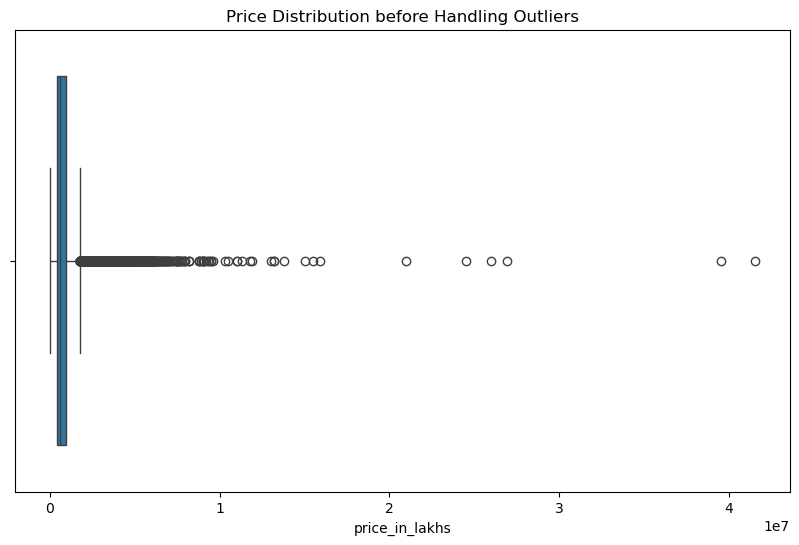

In [717]:
# Box plot for price
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=sample_df['price_in_lakhs'])
plt.title('Price Distribution before Handling Outliers')
plt.show()

In [1251]:
sample_df.drop('trendingText',axis=1,inplace=True)

In [1253]:
sample_df.drop('insurance_validity',axis=1,inplace=True)
sample_df.drop('Comfort & Convenience',axis=1,inplace=True)
sample_df.drop('Entertainment & Communication',axis=1,inplace=True)

In [1255]:
sample_df.drop('max_torque',axis=1,inplace=True)
sample_df.drop('no_of_cylinder',axis=1,inplace=True)
sample_df.drop('values_per_cylinder',axis=1,inplace=True)
sample_df.drop('turbo_charger',axis=1,inplace=True)
sample_df.drop('wheel_base',axis=1,inplace=True)
sample_df.drop('steering_type',axis=1,inplace=True)

In [1257]:
sample_df['mileage'] = sample_df['mileage'].astype('int64')

In [1259]:
sample_df['registration_year'] = sample_df['registration_year'].astype('int64')

In [1261]:
sample_df.drop('model',axis=1,inplace=True)

In [1263]:
sample_df.drop('color',axis=1,inplace=True)

In [1265]:
categorical_columns = sample_df.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)

Categorical Columns:
 Index(['ft', 'bt', 'transmission', 'oem', 'City'], dtype='object')


In [1283]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ft                    8359 non-null   object
 1   bt                    8359 non-null   object
 2   transmission          8359 non-null   object
 3   owner                 8359 non-null   int64 
 4   oem                   8359 non-null   object
 5   modelYear             8359 non-null   int64 
 6   centralVariantId      8359 non-null   int64 
 7   registration_year     8359 non-null   int64 
 8   kms_driven            8359 non-null   int32 
 9   Features              8359 non-null   int64 
 10  Interior              8359 non-null   int64 
 11  Exterior              8359 non-null   int64 
 12  Safety                8359 non-null   int64 
 13  mileage               8359 non-null   int64 
 14  engine                8359 non-null   int32 
 15  seats.1               8359 non-null   int64

In [829]:
before_df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [1269]:
before_df=sample_df.copy()

In [1273]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle


# Identify categorical columns
cat_cols = sample_df.select_dtypes(include='object').columns.tolist()

# Function: One-Hot Encoding
def get_one_hot_encoded_df(df, cols):
    one_hot_df = pd.get_dummies(df[cols], drop_first=False, prefix=cols)
    return one_hot_df

def encode_transmission_binary(df):
    le = LabelEncoder()
    
    # Ensure column is treated as category with 2 values
    unique_vals = df['transmission'].dropna().unique()
    if len(unique_vals) == 2:
        le.fit(sorted(unique_vals))  # Optional: sort ensures 'Automatic' = 0, 'Manual' = 1 (or vice versa)
        df['transmission_encoded'] = le.transform(df['transmission'])
        return df[['transmission', 'transmission_encoded']]
    else:
        raise ValueError("Column 'transmission' must contain exactly 2 unique values for binary encoding.")

# Function: Target Encoding (based on target column)
#def get_target_encoded_df(df, cols, target):
   # target_df = pd.DataFrame()
   # for col in cols:
   #     encoding_map = df.groupby(col)[target].mean()
    #    target_df[col + '_target'] = df[col].map(encoding_map)
   # return target_df

def get_target_encoded_df_and_map(df, cols, target):
    encoding_map = {}
    encoded_df = pd.DataFrame()

    for col in cols:
        mapping = df.groupby(col)[target].mean().to_dict()
        encoding_map[col] = mapping
        encoded_df[col + '_target'] = df[col].map(mapping)

    return encoded_df, encoding_map

# ---------- Choose columns by strategy ----------
# Target column assumed to be 'price'
target_col = 'price_in_lakhs'

# One-Hot Encoding: nominal categories
one_hot_cols = ['ft', 'bt', 'City']
one_hot_encoded = get_one_hot_encoded_df(sample_df, one_hot_cols)

# Label Encoding: binary category
label_encoded = encode_transmission_binary(sample_df)

# Target Encoding: high-cardinality categories
target_cols = ['oem']

# Apply target encoding
target_encoded_df, target_encoding_map = get_target_encoded_df_and_map(sample_df, target_cols, target_col)

# ---------- Save each to pickle ----------
with open("one_hot_encoded.pkl", "wb") as f:
    pickle.dump(one_hot_encoded, f)

with open("label_encoded.pkl", "wb") as f:
    pickle.dump(label_encoded, f)

with open("target_encoding_map.pkl", "wb") as f:
    pickle.dump(target_encoding_map, f)

print("Encoding completed and saved as separate pickle files.")

Encoding completed and saved as separate pickle files.


In [1279]:
 #Select numerical columns
numerical_cols = sample_df.select_dtypes(include=['int64', 'int32']).copy()

In [1281]:
# 3. Concatenate all
final_df = pd.concat([numerical_cols, one_hot_encoded, label_encoded, target_encoded_df], axis=1)

In [1285]:
final_df.drop('transmission',axis=1,inplace=True)

In [1289]:
# Remove duplicate column names, keep the first occurrence
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [1291]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   owner                 8359 non-null   int64  
 1   modelYear             8359 non-null   int64  
 2   centralVariantId      8359 non-null   int64  
 3   registration_year     8359 non-null   int64  
 4   kms_driven            8359 non-null   int32  
 5   Features              8359 non-null   int64  
 6   Interior              8359 non-null   int64  
 7   Exterior              8359 non-null   int64  
 8   Safety                8359 non-null   int64  
 9   mileage               8359 non-null   int64  
 10  engine                8359 non-null   int32  
 11  seats.1               8359 non-null   int64  
 12  no_door_numbers       8359 non-null   int64  
 13  price_in_lakhs        8359 non-null   int64  
 14  transmission_encoded  8359 non-null   int32  
 15  ft_Cng                8359

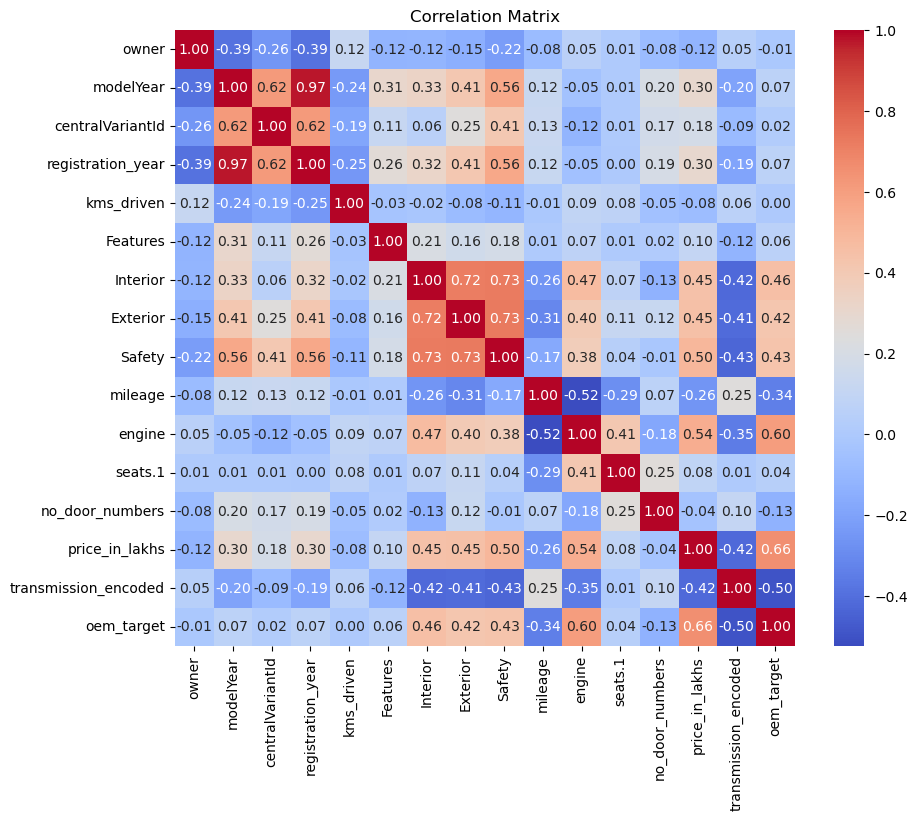


Correlation with target variable (price):
price_in_lakhs          1.000000
oem_target              0.656409
engine                  0.536610
Safety                  0.496813
Exterior                0.448080
Interior                0.445511
modelYear               0.300572
registration_year       0.300153
centralVariantId        0.183122
Features                0.102604
seats.1                 0.084447
no_door_numbers        -0.039713
kms_driven             -0.075745
owner                  -0.120082
mileage                -0.261280
transmission_encoded   -0.422590
Name: price_in_lakhs, dtype: float64

Selected Numeric Columns after Correlation Threshold:
['owner', 'modelYear', 'centralVariantId', 'kms_driven', 'Features', 'Interior', 'Exterior', 'Safety', 'mileage', 'engine', 'seats.1', 'no_door_numbers', 'price_in_lakhs', 'transmission_encoded', 'oem_target']

Final DataFrame with Selected Numeric Columns:
   owner  modelYear  centralVariantId  kms_driven  Features  Interior  \
0     

In [1293]:
# Assuming df_car_detail is your DataFrame and 'price' is the target variable

# 1. Filter numeric columns
numeric_columns = final_df.select_dtypes(include=['int64', 'float64', 'int32', 'float32', 'Int64']).columns

# 2. Calculate the correlation matrix
correlation_matrix = final_df[numeric_columns].corr()

# 3. Plot the correlation matrix (Optional - useful for visualizing correlations)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# 4. Get correlation with target variable (e.g., 'price')
correlation_with_target = correlation_matrix['price_in_lakhs'].sort_values(ascending=False)

print("\nCorrelation with target variable (price):")
print(correlation_with_target)

# 5. Remove highly correlated features (threshold can be adjusted)
threshold = 0.8
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop correlated features
selected_numeric_columns = [col for col in numeric_columns if col not in correlated_features]

print("\nSelected Numeric Columns after Correlation Threshold:")
print(selected_numeric_columns)

# 6. Create the final dataset with selected features
selected_numeric_df = final_df[selected_numeric_columns]

print("\nFinal DataFrame with Selected Numeric Columns:")
print(selected_numeric_df.head())

In [1295]:
selected_numeric_df.drop('Safety',axis=1,inplace=True)
selected_numeric_df.drop('no_door_numbers',axis=1,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1046686474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_numeric_df.drop('Safety',axis=1,inplace=True)
C:\Users\babuk\AppData\Local\Temp\ipykernel_6076\1046686474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_numeric_df.drop('no_door_numbers',axis=1,inplace=True)


In [1297]:
final_df['transmission_encoded'].unique()

array([1, 0])

In [1299]:
final_df['oem_target'].unique()

array([ 505554.95327103,  726799.95806452,  772916.09512761,
        606278.73333333, 1925178.52678571,  347810.75675676,
        624361.62080925,  976169.70557029, 4256302.02857143,
       3494733.67934783,  536105.69871795, 2373935.81410256,
       1393570.94444444, 3004166.66666667, 1447879.67088608,
        989844.68322981,  703010.13265306, 3188731.68292683,
       1963866.6       ,  579320.43589744,  290967.67741935,
        950000.        ,  592285.71428571, 3280142.85714286,
       5677931.79545455,  253855.18421053, 1951250.        ,
         73333.33333333,  121600.        , 1463799.8       ,
       6741666.66666667, 6835000.        ,  297500.        ])

In [1301]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming combined_df contains both numeric and boolean features, and price is the target column

# 1. Filter numeric and boolean columns in combined_df (excluding 'price')
numeric_columns = selected_numeric_df.select_dtypes(include=['int64', 'float64', 'int32', 'Int64']).columns
#boolean_columns = combined_df.select_dtypes(include=['bool']).columns

# Combine numeric and boolean columns (excluding 'price')
all_columns = list(numeric_columns)
all_columns = [col for col in all_columns if col != 'price_in_lakhs']  # Exclude 'price' from features

# Define features (X) and target (y)
X = final_df[all_columns]  # Features excluding 'price'
y = final_df['price_in_lakhs']  # Target column is 'price'

# 2. Fit Random Forest Regressor to identify feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# 3. Get feature importance for all columns
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Print feature importance scores
print("Feature Importance Scores:")
for column, importance in feature_importance.items():
    print(f"Feature: {column}, Importance Score: {importance:.4f}")

# 4. Select the top 25 features based on feature importance
top_25_features = feature_importance.nlargest(25)
print("\nTop 25 Features based on importance scores:")
print(top_25_features)

# 5. Create a DataFrame with only the top 25 selected features
top_25_features_df = final_df[top_25_features.index]

# Print the shape and first 5 rows of the final transformed DataFrame
print("\nShape of Transformed DataFrame with Top 25 Features:", top_25_features_df.shape)
print("\nTransformed DataFrame with Top 25 Features (First 5 Rows):")
print(top_25_features_df.head())

Feature Importance Scores:
Feature: owner, Importance Score: 0.0021
Feature: modelYear, Importance Score: 0.1668
Feature: centralVariantId, Importance Score: 0.0394
Feature: kms_driven, Importance Score: 0.0367
Feature: Features, Importance Score: 0.0032
Feature: Interior, Importance Score: 0.0248
Feature: Exterior, Importance Score: 0.0700
Feature: mileage, Importance Score: 0.0302
Feature: engine, Importance Score: 0.2441
Feature: seats.1, Importance Score: 0.0063
Feature: transmission_encoded, Importance Score: 0.0020
Feature: oem_target, Importance Score: 0.3744

Top 25 Features based on importance scores:
oem_target              0.374403
engine                  0.244150
modelYear               0.166788
Exterior                0.069950
centralVariantId        0.039415
kms_driven              0.036683
mileage                 0.030222
Interior                0.024829
seats.1                 0.006304
Features                0.003195
owner                   0.002076
transmission_encode

In [1303]:
# Get all numeric columns
numeric_cols = final_df.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()

# Remove 'price' from that list so we can keep it
numeric_cols.remove('price_in_lakhs')

# Drop the remaining numeric columns from final_df
final_df_no_numerical = final_df.drop(columns=numeric_cols)

In [1305]:
final_df_no_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price_in_lakhs    8359 non-null   int64
 1   ft_Cng            8359 non-null   bool 
 2   ft_Diesel         8359 non-null   bool 
 3   ft_Electric       8359 non-null   bool 
 4   ft_Lpg            8359 non-null   bool 
 5   ft_Petrol         8359 non-null   bool 
 6   bt_Convertibles   8359 non-null   bool 
 7   bt_Coupe          8359 non-null   bool 
 8   bt_Hatchback      8359 non-null   bool 
 9   bt_Hybrids        8359 non-null   bool 
 10  bt_MUV            8359 non-null   bool 
 11  bt_Minivans       8359 non-null   bool 
 12  bt_Pickup Trucks  8359 non-null   bool 
 13  bt_SUV            8359 non-null   bool 
 14  bt_Sedan          8359 non-null   bool 
 15  bt_Wagon          8359 non-null   bool 
 16  City_Bangalore    8359 non-null   bool 
 17  City_Chennai      8359 non-null   bool

In [1307]:
# 3. Combine the selected numeric DataFrame (selected_numeric_df) with the boolean columns
features_df = pd.concat([top_25_features_df, final_df_no_numerical], axis=1)

In [1309]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   oem_target            8359 non-null   float64
 1   engine                8359 non-null   int32  
 2   modelYear             8359 non-null   int64  
 3   Exterior              8359 non-null   int64  
 4   centralVariantId      8359 non-null   int64  
 5   kms_driven            8359 non-null   int32  
 6   mileage               8359 non-null   int64  
 7   Interior              8359 non-null   int64  
 8   seats.1               8359 non-null   int64  
 9   Features              8359 non-null   int64  
 10  owner                 8359 non-null   int64  
 11  transmission_encoded  8359 non-null   int32  
 12  price_in_lakhs        8359 non-null   int64  
 13  ft_Cng                8359 non-null   bool   
 14  ft_Diesel             8359 non-null   bool   
 15  ft_Electric           8359

In [1311]:
from datetime import datetime

# Assuming your DataFrame is df_car_detail and it has a column 'modelYear' or 'registration_year'

# Get the current year
current_year = datetime.now().year

# If 'modelYear' is available, calculate the car age using 'modelYear'
# df_car_detail['car_age'] = current_year - df_car_detail['modelYear']

# Alternatively, use 'registration_year' if it's available
features_df['car_age'] = current_year - features_df['modelYear']

# Check if the 'car_age' column is added
print(features_df[['modelYear', 'car_age']].head())

   modelYear  car_age
0       2015       10
1       2018        7
2       2018        7
3       2014       11
4       2015       10


In [1313]:
features_df['car_age'].unique()

array([10,  7, 11,  5,  8,  4,  6,  3,  9, 14, 16, 12, 15, 17, 19, 13, 20,
       18,  2, 30, 21, 22, 27, 24, 23, 26, 40], dtype=int64)

In [1323]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load Features and Target
X = features_df.drop(columns=['price_in_lakhs'])
y = features_df['price_in_lakhs']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Improved XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=200,         # number of trees
    learning_rate=0.05,       # lower = better learning, but may need more trees
    max_depth=6,              # deeper = more complex model
    subsample=0.8,            # sample ratio for training each tree (helps generalize)
    colsample_bytree=0.8,     # sample ratio of features for each tree
    reg_alpha=0.5,            # L1 regularization (sparsity)
    reg_lambda=1.0,           # L2 regularization (shrinkage)
    gamma=0.1,                # min loss reduction to split a node
    random_state=40
)

# Step 4: Train the Model
xgb_model.fit(X_train, y_train)

# Step 5: Predictions & Evaluation
y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Evaluation
print(f"XGBoost Performance on Test Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

XGBoost Performance on Test Set:
MAE: 149473.0681
MSE: 519105426137.9897
R²: 0.7291


In [1317]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)

param_dist = {
    "n_estimators": [100, 300, 500, 700],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 6, 8],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [0.5, 1.0, 2.0],
    "gamma": [0, 0.1, 0.3]
}

random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    scoring='neg_mean_absolute_error',
    n_iter=25, cv=3, verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved XGBoost+ Model:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Improved XGBoost+ Model:
MAE: 132255.8434
MSE: 478427190666.0196
R²: 0.7503


In [1319]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation

# 🔹 Train LightGBM Model
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[early_stopping(stopping_rounds=100), log_evaluation(0)]
)

# 🔹 Predict
y_pred = lgb_model.predict(X_test)

# 🔹 Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("LightGBM Performance on Test Set:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 6687, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 949468.912517
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[496]	valid_0's l2: 3.23479e+11
LightGBM Performance on Test Set:
MAE: 142777.5603
MSE: 323478639126.1252
R²: 0.8312


In [939]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 2. **Model Selection** and Cross-Validation

# Define the models to be used
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'Lasso': Lasso(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'xgboost': xgb.XGBRegressor(random_state=42),
}

# Initialize KFold cross-validation with 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate models using cross-validation
cv_results = {}
for model_name, model in models.items():
    # Perform cross-validation and store the results
    cv_score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    cv_results[model_name] = -np.mean(cv_score)  # Negate to show positive MAE value

# Print cross-validation results (Mean Absolute Error)
for model_name, score in cv_results.items():
    print(f"{model_name}: Cross-validated MAE = {score:.4f}")

C:\Users\babuk\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.282e+15, tolerance: 7.658e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\babuk\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+15, tolerance: 6.816e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\babuk\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e+15, toleranc

Linear Regression: Cross-validated MAE = 351019.3073
Decision Tree: Cross-validated MAE = 199397.1267
Random Forest: Cross-validated MAE = 140679.7209
Lasso: Cross-validated MAE = 350943.3486
Gradient Boosting: Cross-validated MAE = 172517.2878
xgboost: Cross-validated MAE = 135646.7953


In [935]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# 1. **Random Forest Hyperparameter Tuning with GridSearchCV**
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# 2. **Gradient Boosting Hyperparameter Tuning with GridSearchCV**
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

# 3. **XGBoost Hyperparameter Tuning with GridSearchCV**
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                               param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train, y_train)

# 4. **Decision Tree Hyperparameter Tuning with GridSearchCV**
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                              param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train, y_train)

# Now, let's define a function to evaluate all models on the test set

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")

# 5. **Evaluating Best Models**
print("\nRandom Forest Performance on Test Set:")
evaluate_model(grid_search_rf.best_estimator_, X_test, y_test)

print("\nGradient Boosting Performance on Test Set:")
evaluate_model(grid_search_gb.best_estimator_, X_test, y_test)

print("\nXGBoost Performance on Test Set:")
evaluate_model(grid_search_xgb.best_estimator_, X_test, y_test)

print("\nDecision Tree Performance on Test Set:")
evaluate_model(grid_search_dt.best_estimator_, X_test, y_test)


Random Forest Performance on Test Set:
MAE: 146854.0317
MSE: 531609604759.1320
R²: 0.7226

Gradient Boosting Performance on Test Set:
MAE: 137025.1036
MSE: 550705742289.1649
R²: 0.7126

XGBoost Performance on Test Set:
MAE: 162050.6122
MSE: 468062256227.9804
R²: 0.7557

Decision Tree Performance on Test Set:
MAE: 198992.4875
MSE: 533894313147.6287
R²: 0.7214


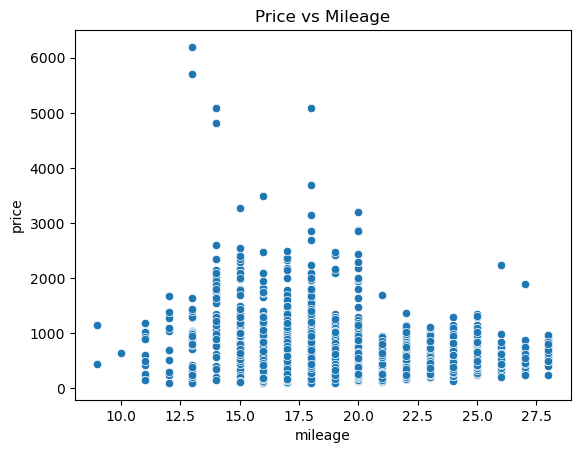

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for price vs. mileage
sns.scatterplot(data=df_reverted, x='mileage', y='price')
plt.title('Price vs Mileage')
plt.show()

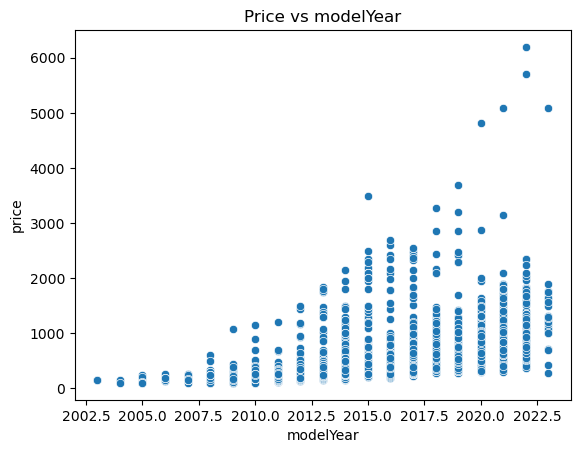

In [401]:
# Scatter plot for price vs. modelYear
sns.scatterplot(data=df_reverted, x='modelYear', y='price')
plt.title('Price vs modelYear')
plt.show()

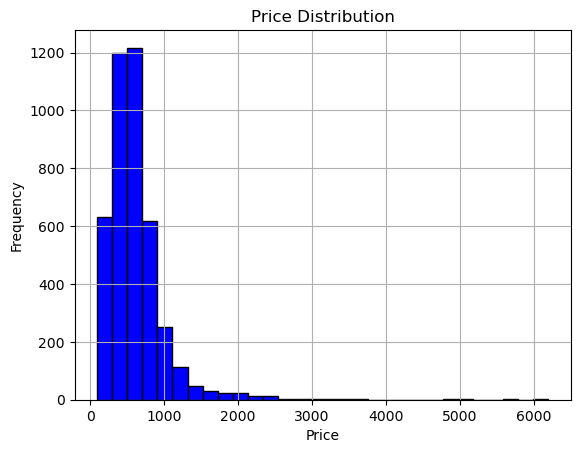

In [403]:
df_reverted['price'].hist(bins=30, color='blue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [1325]:
import joblib

joblib.dump(lgb_model, 'lightgbm_price_model.pkl')

print("Model saved as 'lightgbm_price_model.pkl'")

Model saved as 'lightgbm_price_model.pkl'


In [1327]:
features_df.to_csv(r'C:\Users\babuk\Downloads\finalregress.csv',index=False)